<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_17_Feb_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Load the data
df = pd.read_csv('market basket analysis.csv')

# Step 2: Prepare data for analysis (Convert product columns into transactions)
# Convert the dataframe into a list of transactions
transactions = []

# Loop through each row and collect the products
for index, row in df.iterrows():
    transaction = [str(product) for product in row[1:] if pd.notnull(product)]
    transactions.append(transaction)

# Step 3: Transform the transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Step 4: Convert into a DataFrame
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 5: Run the Apriori algorithm to find frequent itemsets (set a minimum support threshold)
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Step 6: Generate association rules (find lifts)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 7: Identify the hero products (those with high lift values)
# The hero product is typically the one with the highest lift that increases the likelihood of other products being purchased together
hero_product = rules.loc[rules['lift'] == rules['lift'].max()]

# Display the top rule
print("Hero Product and its Lift Impact:\n", hero_product)

# Optionally, you can explore other rules with high lift
print("\nOther High Lift Rules:\n", rules.sort_values(by='lift', ascending=False).head(10))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hero Product and its Lift Impact:
               antecedents consequents  antecedent support  consequent support  \
402  (yogurt, whole milk)      (curd)            0.054601            0.052872   

      support  confidence      lift  representativity  leverage  conviction  \
402  0.010066    0.184358  3.486839               1.0  0.007179    1.161204   

     zhangs_metric  jaccard  certainty  kulczynski  
402       0.754398  0.10334   0.138825    0.187371  

Other High Lift Rules:
                             antecedents                         consequents  \
402                (yogurt, whole milk)                              (curd)   
403                              (curd)                (yogurt, whole milk)   
448  (tropical fruit, other vegetables)                   (root vegetables)   
453                   (root vegetables)  (tropical fruit, other vegetables)   
490          (yogurt, other vegetables)                (whipped/sour cream)   
495                (whipped/sour cream

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Load the data
df = pd.read_csv('market basket analysis.csv')

# Step 2: Prepare data for analysis (Convert product columns into transactions)
transactions = []

# Loop through each row and collect the products
for index, row in df.iterrows():
    transaction = [str(product) for product in row[1:] if pd.notnull(product)]
    transactions.append(transaction)

# Step 3: Transform the transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Step 4: Convert into a DataFrame
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 5: Run the Apriori algorithm to find frequent itemsets (set a minimum support threshold)
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Step 6: Generate association rules (find lifts)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 7: Find the top 5 hero products based on the highest lift value
# We focus on the antecedents of the rules that have the highest lift
# Extract the antecedents and their lift values
hero_products = rules[['antecedents', 'lift']]

# Flatten the antecedents (if a product appears in multiple sets, we count it multiple times)
hero_products_flat = hero_products.explode('antecedents')

# Count the frequency of each product appearing in the antecedents
hero_product_counts = hero_products_flat['antecedents'].value_counts()

# Step 8: List down the top 5 hero products with the highest lift impact
top_5_hero_products = hero_product_counts.head(5)

# Display the top 5 hero products
print("Top 5 Hero Products based on Lift Impact:\n", top_5_hero_products)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 5 Hero Products based on Lift Impact:
 antecedents
whole milk          111
other vegetables     98
yogurt               61
rolls/buns           48
root vegetables      43
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-e40b86618d99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Product', data=hero_products_df, palette='viridis')


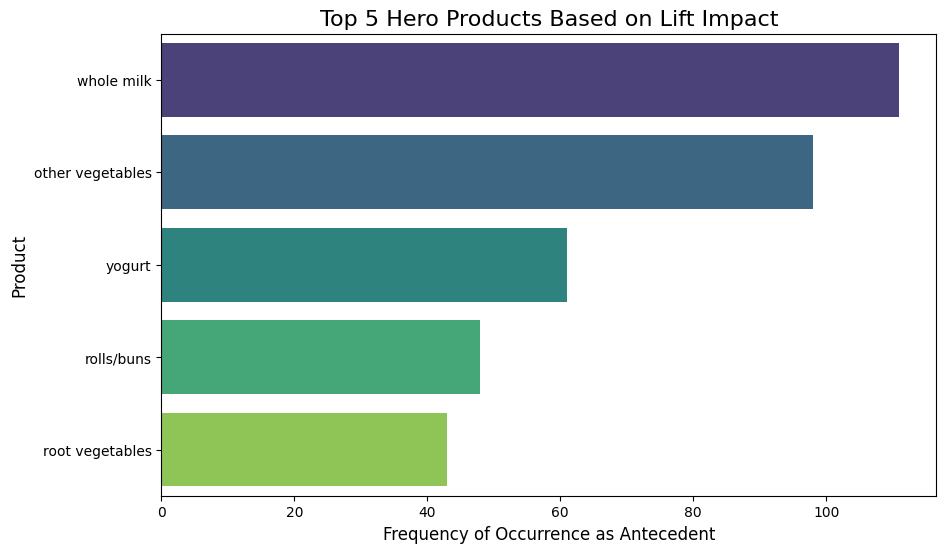

<ipython-input-5-e40b86618d99>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lift', y='Antecedents', data=hero_product_lift_df, palette='coolwarm')


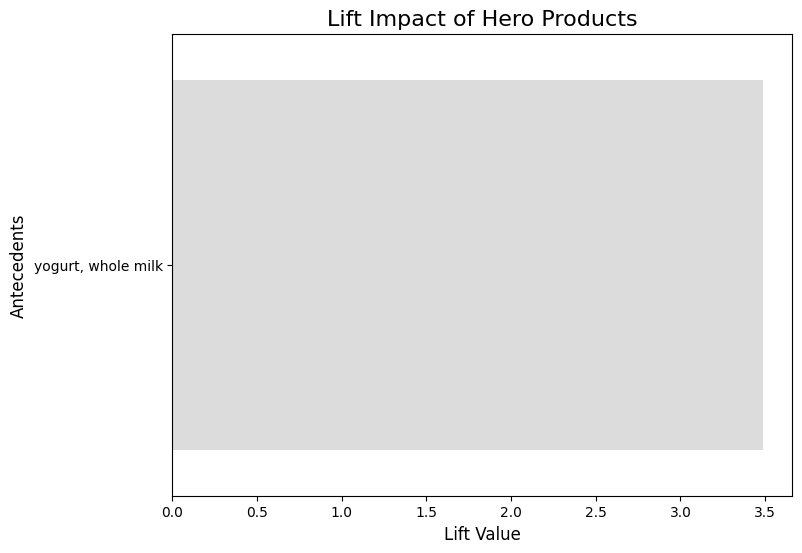

<ipython-input-5-e40b86618d99>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lift', y='Antecedents', data=other_high_lift_df, palette='magma')


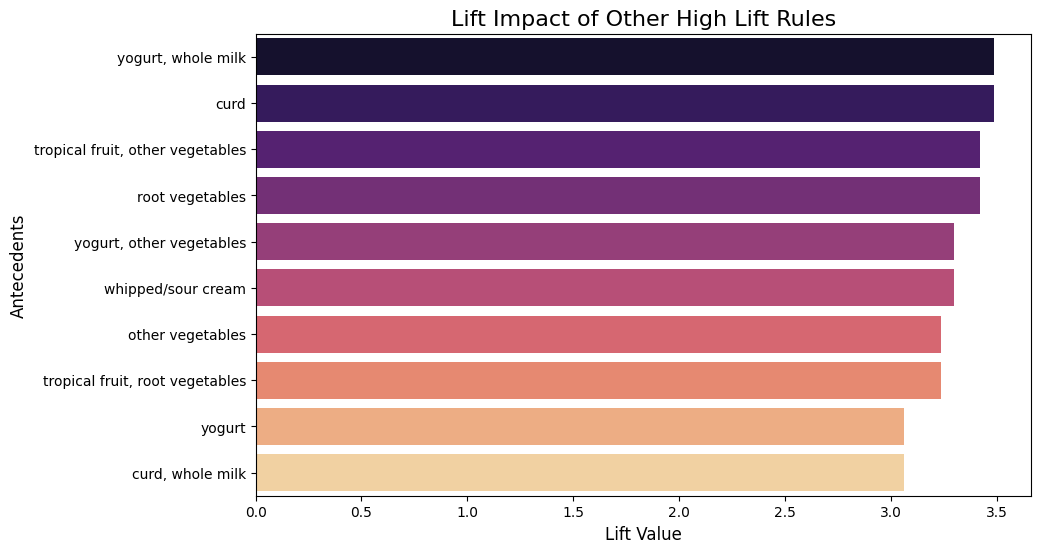

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for Top 5 Hero Products
hero_products = {
    'Product': ['whole milk', 'other vegetables', 'yogurt', 'rolls/buns', 'root vegetables'],
    'Frequency': [111, 98, 61, 48, 43]
}

hero_products_df = pd.DataFrame(hero_products)

# Plotting the Top 5 Hero Products Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Product', data=hero_products_df, palette='viridis')
plt.title('Top 5 Hero Products Based on Lift Impact', fontsize=16)
plt.xlabel('Frequency of Occurrence as Antecedent', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

# Data for Hero Product and its Lift Impact
hero_product_lift_data = {
    'Antecedents': ['yogurt, whole milk'],
    'Consequents': ['curd'],
    'Lift': [3.486839]
}

hero_product_lift_df = pd.DataFrame(hero_product_lift_data)

# Plotting the Lift Impact of Hero Products
plt.figure(figsize=(8, 6))
sns.barplot(x='Lift', y='Antecedents', data=hero_product_lift_df, palette='coolwarm')
plt.title('Lift Impact of Hero Products', fontsize=16)
plt.xlabel('Lift Value', fontsize=12)
plt.ylabel('Antecedents', fontsize=12)
plt.show()

# Data for Other High Lift Rules
other_high_lift_data = {
    'Antecedents': ['yogurt, whole milk', 'curd', 'tropical fruit, other vegetables',
                    'root vegetables', 'yogurt, other vegetables', 'whipped/sour cream',
                    'other vegetables', 'tropical fruit, root vegetables', 'yogurt', 'curd, whole milk'],
    'Consequents': ['curd', 'yogurt, whole milk', 'root vegetables', 'tropical fruit, other vegetables',
                    'whipped/sour cream', 'yogurt, other vegetables', 'tropical fruit, root vegetables',
                    'other vegetables', 'curd, whole milk', 'yogurt'],
    'Lift': [3.486839, 3.486839, 3.423945, 3.423945, 3.299196, 3.299196, 3.237614, 3.237614, 3.064442, 3.064442]
}

other_high_lift_df = pd.DataFrame(other_high_lift_data)

# Plotting the Lift Impact of Other High Lift Rules
plt.figure(figsize=(10, 6))
sns.barplot(x='Lift', y='Antecedents', data=other_high_lift_df, palette='magma')
plt.title('Lift Impact of Other High Lift Rules', fontsize=16)
plt.xlabel('Lift Value', fontsize=12)
plt.ylabel('Antecedents', fontsize=12)
plt.show()
